# Face Classification

In [34]:
#3_5_1166, 3_20_45, 8_9_136, 13_6_981
#.split('/')[0] .split('/')[1]
#(3,5):0, (3,20):1, (4,2):2
cls = {(3,5):0,(3,20):1,(4,2):2,(4,7):3,(4,11):4,(5,8):5,(7,1):6,
       (7,20):7,(8,6):8,(8,9):9,(10,20):10,(11,14):11,(13,1):12,
       (13,6):13,(13,9):14,(13,15):15,(13,16):16,(13,17):17,(13,18):18,(13,20):19}

In [36]:
a = '3_5_1166'
cls[int(a.split('_')[0]),int(a.split('_')[1])] ##THIS!

0

In [52]:
import os, shutil

#os.chdir('./testing')#C:\Users\piai\Documents\Competition

os.chdir('C:/Users\piai/Documents/Competition/faceset')
lst = []
dct = {}
n = 0 
for f in os.listdir("train"):
    if not f == 'train.tsv':
        n+=1
        folderName = str(cls[int(f.split('_')[0]),int(f.split('_')[1])])
        if folderName in dct:
            dct[folderName] += 1
        else:
            dct[folderName] = 1
        
# print(len(lst))
# print(lst)
        if not os.path.exists(folderName):
            os.mkdir(folderName)
            shutil.copy(os.path.join('train', f), folderName)
        else:
            shutil.copy(os.path.join('train', f), folderName)
print('dct',dct)
print('n:',n)

dct {'10': 800, '11': 800, '15': 800, '16': 800, '17': 800, '18': 800, '12': 800, '19': 800, '13': 800, '14': 800, '1': 800, '0': 800, '4': 800, '2': 800, '3': 800, '5': 800, '6': 800, '7': 800, '8': 800, '9': 800}
n: 16000


In [53]:
import os
# dir = 'C:/Users\piai/Documents/Competition/faceset/0'
# list = os.listdir(dir) # dir is your directory path
# number_files = len(list)
# print(number_files)


dir = 'C:/Users\piai/Documents/Competition/faceset/'
cnt_files = []
for i in range(20):
    list = os.listdir(dir+str(i)) # dir is your directory path
    number_files = len(list)
    cnt_files.append([i,number_files])
print(cnt_files)


[[0, 800], [1, 800], [2, 800], [3, 800], [4, 800], [5, 800], [6, 800], [7, 800], [8, 800], [9, 800], [10, 800], [11, 800], [12, 800], [13, 800], [14, 800], [15, 800], [16, 800], [17, 800], [18, 800], [19, 800]]


### Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


### hyperparameter setting

In [17]:
learning_rate = 1e-3
training_epochs = 100 #300
display_step = 10
batch_size = 16 #32   

activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2)

### Load data & Pre-process data

In [3]:
trans = transforms.Compose([transforms.Resize(32), transforms.ToTensor()]) 
dataset = torchvision.datasets.ImageFolder(root = 'C:/Users\piai/Documents/Competition/faceset', transform = trans) 

In [4]:
dataset.__getitem__(0)

(tensor([[[0.0000, 0.0000, 0.0039,  ..., 0.5255, 0.5569, 0.2627],
          [0.0000, 0.0000, 0.0000,  ..., 0.5294, 0.4627, 0.0902],
          [0.0000, 0.0000, 0.0000,  ..., 0.5020, 0.2314, 0.0118],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0039,  ..., 0.5804, 0.5569, 0.2549],
          [0.0000, 0.0000, 0.0000,  ..., 0.5922, 0.4588, 0.0824],
          [0.0000, 0.0000, 0.0000,  ..., 0.5412, 0.2157, 0.0078],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0039, 0.0078,  ..., 0.4784, 0.4549, 0.2196],
          [0.0000, 0.0000, 0.0039,  ..., 0.4824, 0.3882, 0.0784],
          [0.0000, 0.0000, 0.0000,  ...,

In [5]:
len(dataset)

16000

In [6]:
classes = dataset.classes
classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [7]:
len(dataset)*0.8, len(dataset)*0.2

(12800.0, 3200.0)

In [8]:
train_set, test_set = torch.utils.data.random_split(dataset, [12800, 3200])

In [9]:
train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)

data shape:  torch.Size([32, 3, 32, 32])
label:  tensor([15, 18, 10, 11,  1, 19, 17,  6, 19,  8, 19, 18,  0,  1,  4, 10,  3,  3,
         1,  6, 18, 13, 13,  6,  4, 12,  5, 18, 16,  2, 10,  1])


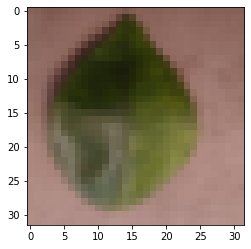

In [10]:
# check the data

examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape: ', example_data.shape)
print('label: ', example_target)


check_image = example_data[0]
check_image = np.transpose(check_image, (1,2,0))

plt.figure()
plt.imshow(check_image)
plt.show()

### Model & Optimization and Loss function

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(
            
            # input_size = 32 X 32 X 3
            nn.Conv2d(3, 64, 2), 
            activation,
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128,2),  
            activation,
            nn.BatchNorm2d(128),
            max_pool,  
            nn.Dropout2d(0.4),
            
            
            nn.Conv2d(128,128,2), 
            activation,
            nn.BatchNorm2d(128),
            nn.Conv2d(128,256,3), 
            activation,
            nn.BatchNorm2d(256),
            max_pool,  
            nn.Dropout2d(0.4),
            
            
            nn.Conv2d(256,512,2),  
            activation,
            nn.BatchNorm2d(512),
            nn.Conv2d(512,512,2), 
            activation,
            nn.BatchNorm2d(512),
            max_pool,  
            nn.Dropout2d(0.4)
            
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 2 * 2, 256),
            activation,
            nn.Linear(256, 10)
        )
        
    def forward(self, x):
        extracted_feature = self.feature_extraction(x) 
        flatten = extracted_feature.view(batch_size, -1)
        result = self.classifier(flatten)
        return result

In [13]:
# GPU 할당 변경하기
GPU_NUM = 0 # 원하는 GPU 번호 입력
device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device) # change allocation of current GPU
print ('Current cuda device ', torch.cuda.current_device()) # check

# Additional Infos
if device.type == 'cuda':
    print(torch.cuda.get_device_name(GPU_NUM))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(GPU_NUM)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(GPU_NUM)/1024**3,1), 'GB')

Current cuda device  0
GeForce GTX 1080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


C:\Users\piai\anaconda3\envs\pytorch\lib\site-packages\torch\cuda\memory.py:344: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [14]:
model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

### Train & Test

In [18]:
#https://brstar96.github.io/shoveling/device_error_summary/
loss_array = []
    
#train the model
for i in range(training_epochs):
    for idx, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i, loss))
        loss_array.append(loss.cpu().detach().numpy())

RuntimeError: CUDA error: device-side assert triggered

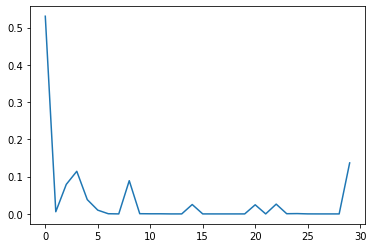

In [ ]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [ ]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Test accuracy: {}".format(correct/total))

Valid accuracy: 0.9166666865348816
